# 02 - Uplift Modeling & Qini Curve Demo
This notebook demonstrates uplift modeling using a T-learner.

In [1]:
import sys, os

notebook_dir = os.getcwd()

# Project root = notebook_dir/..
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add vào sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to path:", project_root)

Project root added to path: d:\VSCode\External project\AB_Email_Testing


In [2]:
from src.data.data_loader import load_hillstrom, prepare_treatment
from src.models.uplift_model import train_uplift_tlearner, plot_qini_vs_k
from src.models.roi import simulate_roi
import pandas as pd
df = load_hillstrom()

d:\VSCode\External project\AB_Email_Testing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare data for uplift modeling

In [3]:
sub = prepare_treatment(df, 'Mens E-Mail', 'No E-Mail')
exclude={'conversion','treatment','segment','visit','spend'}
features=[c for c in sub.columns if c not in exclude]

## Train uplift model

In [4]:
res = train_uplift_tlearner(sub, features)
res.head()

,y_true,treatment,uplift_pred
0,0,0,0.007833
1,0,1,0.007062
2,0,1,0.010158
3,1,0,-0.002986
4,0,0,0.011273


## Plot Qini curve

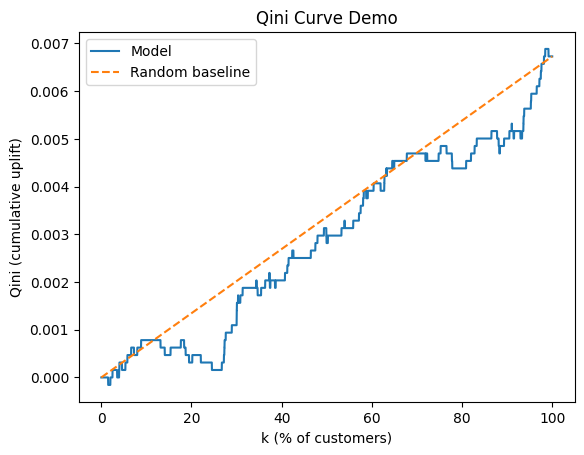

In [5]:
plot_qini_vs_k(res['y_true'], res['uplift_pred'], res['treatment'], title='Qini Curve Demo', show=True)

## ROI simulation

In [6]:
ks=[0.05,0.1,0.2,0.3,1.0]
simulate_roi(res['y_true'], res['treatment'], res['uplift_pred'], ks)

,k,uplift_at_k,n_mailed,incremental_conv,revenue_gain,email_cost,net_profit
0,0.05,0.002617,639,1.672283,16.722830,63.9,-47.177170
1,0.10,0.008113,1278,10.368254,103.682540,127.8,-24.117460
2,0.20,0.001479,2556,3.781021,37.810211,255.6,-217.789789
3,0.30,0.003411,3835,13.080754,130.807541,383.5,-252.692459
4,1.00,0.006727,12784,86.000000,860.000000,1278.4,-418.400000
